# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Artech House, 2020
<br/>

# Bistatic Radar Range Equation
***

The output signal to noise ratio for a bistatic radar configuration is given by (Equation 4.61)

\begin{equation}\label{eq:bistatic_snr_output}
    {SNR}_o = \frac{P_t\, G_t(\theta, \phi)\, G_r(\theta, \phi)\, \sigma(\theta, \phi)\, \lambda^2}{(4\pi)^3\,k\,T_0\,B\,F L_t\, L_r\,r_t^2\,r_r^2}
\end{equation}
***

Begin by getting the library path

In [1]:
import lib_path

Set the minimum and maximum range product (m)

In [2]:
range_product_min = 1e6

range_product_max = 1e9

Import the `linspace` routine from `scipy`

In [3]:
from scipy import linspace

Set up the range product array

In [4]:
range_product = linspace(range_product_min, range_product_max, 2000)

Set the noise figure (dB), transmit losses (dB), receive losses (dB), transmit antenna gain (dB), receive antenna gain (dB), and the bistatic target RCS (dBsm)

In [5]:
noise_figure = 3.0

transmit_losses = 9.0

receive_losses = 6.0

transmit_antenna_gain = 25.0

receive_antenna_gain = 30.0

bistatic_target_rcs = -10.0

Set the system temperature (K), the bandwidth (Hz), the transmit peak power (W), and the operating frequency (Hz)

In [6]:
system_temperature = 290

bandwidth = 1e6

peak_power = 50e3

frequency = 1e9

Set up the input args

In [7]:
kwargs = {'transmit_target_range': 1.0,

          'receive_target_range': range_product,

          'system_temperature': system_temperature,

          'bandwidth': bandwidth,

          'noise_factor': 10 ** (noise_figure / 10.0),

          'transmit_losses': 10 ** (transmit_losses / 10.0),

          'receive_losses': 10 ** (receive_losses / 10.0),

          'peak_power': peak_power,

          'transmit_antenna_gain': 10 ** (transmit_antenna_gain / 10.0),

          'receive_antenna_gain': 10 ** (receive_antenna_gain / 10.0),

          'frequency': frequency,
          
          'bistatic_target_rcs': 10 ** (bistatic_target_rcs / 10.0)}

Import the `output_snr` routine from `bistatic_radar_range`

In [8]:
from Libs.radar_range.bistatic_radar_range import output_snr

Calculate the bistatic output signal to noise ratio

In [9]:
output_snr = output_snr(**kwargs)

Import the `matplotlib` routines and `log10` from `scipy` for displaying the results

In [10]:
from matplotlib import pyplot as plt

from scipy import log10

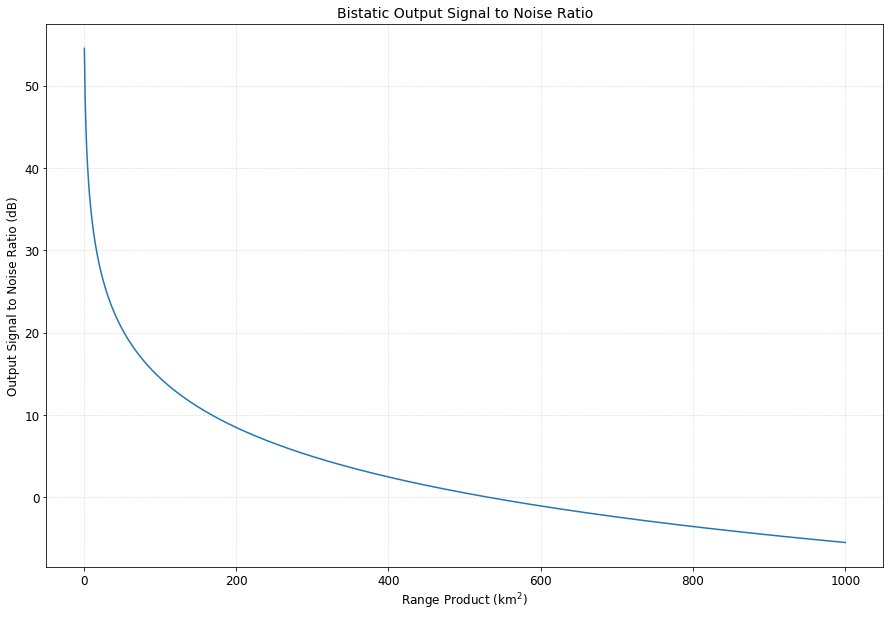

In [11]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(range_product / 1.0e6, 10.0 * log10(output_snr), '')


# Set the plot title and labels

plt.title('Bistatic Output Signal to Noise Ratio', size=14)

plt.xlabel('Range Product (km$^2$)', size=12)

plt.ylabel('Output Signal to Noise Ratio (dB)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)